In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Full

## Load the data

In [2]:
url = 'https://data.open-power-system-data.org/time_series/2020-10-06/'
datafile = url + 'time_series_60min_singleindex.csv'
df_all = pd.read_csv(datafile, index_col='utc_timestamp', parse_dates=True, low_memory=False)

## Clear timezones


In [3]:
df_all.index = df_all.index.tz_localize(None)

## First look at the data

In [4]:
df_all.head()

,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:00:00,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,734.81,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
2015-01-01 02:00:00,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,766.64,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
2015-01-01 03:00:00,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,733.13,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


There are NaN's

## Add helper functions

In [6]:
def extract_country(df_all, country_code, year_min=None, year_max=None):
    """Extract data for a single country"""

    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]

    # Extract columns and remove country codes from column labels
    columns_map = {col : col[3:] for col in columns}
    df_out = df_all[columns].rename(columns=columns_map)

    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]

    return df_out

def transform_dataframe(df, cols_map):
    # Rename columns for convenience
    df = df[list(cols_map.keys())].rename(columns=cols_map)
    # Convert from MW to GW
    df = df / 1000
#     df = df.groupby(df.index.hour).mean()
    df = df.rename_axis('Date')

    return df

## Select country  for analysis

Let's select Spain for the analisys

In [7]:
df_hrly = extract_country(df_all, country_code='ES', year_min=2015, year_max=2019)
df_hrly.sample(3)


,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,solar_generation_actual,wind_onshore_generation_actual
utc_timestamp,,,,
2019-05-01 23:00:00,21007.0,21249.0,593.0,8338.0
2015-10-19 10:00:00,31889.0,31984.0,1867.0,4837.0
2017-08-05 16:00:00,31878.0,31800.0,3814.0,9141.0


## Transform the data and drop NaN's

# EDA Spain

In [8]:
cols_map = {'load_actual_entsoe_transparency' : 'Consumption',
            'wind_onshore_generation_actual' : 'Wind',
            'solar_generation_actual' : 'Solar'}
df = transform_dataframe(df_hrly, cols_map).dropna()

Let's add Green and Fossil energy sources

In [9]:
df['Green'] = df[['Wind', 'Solar']].sum(axis=1, skipna=False)
df['Fossil'] = df['Consumption'] - df['Green']
df.head()

,Consumption,Wind,Solar,Green,Fossil
Date,,,,,
2015-01-01 01:00:00,22.734,5.461,0.050,5.511,17.223
2015-01-01 02:00:00,21.286,5.238,0.050,5.288,15.998
2015-01-01 03:00:00,20.264,4.935,0.042,4.977,15.287
2015-01-01 04:00:00,19.905,4.618,0.034,4.652,15.253
2015-01-01 05:00:00,20.010,4.397,0.034,4.431,15.579


## Save the data

In [ ]:
df.to_parquet('../data/es_clf_data.parquet', compression='gzip', engine='pyarrow')

## Summary statistics of the dataset

In [10]:
summary_statistics = df.describe()

summary_statistics


,Consumption,Wind,Solar,Green,Fossil
count,43801.000000,43801.000000,43801.000000,43801.000000,43801.000000
mean,28.667275,5.568201,1.475366,7.043567,21.623708
std,4.565216,3.273209,1.732904,3.422895,4.993468
min,17.168000,0.000000,0.000000,0.000000,4.943000
25%,24.800000,2.996000,0.069000,4.443000,18.140000
50%,28.871000,4.935000,0.622000,6.685000,21.493000
75%,32.143000,7.529000,2.666000,9.161000,25.229000
max,41.015000,17.436000,6.748000,19.770000,37.451000


## Plotting time series trends for 'Consumption', 'Wind', 'Solar', 'Green', and 'Fossil'

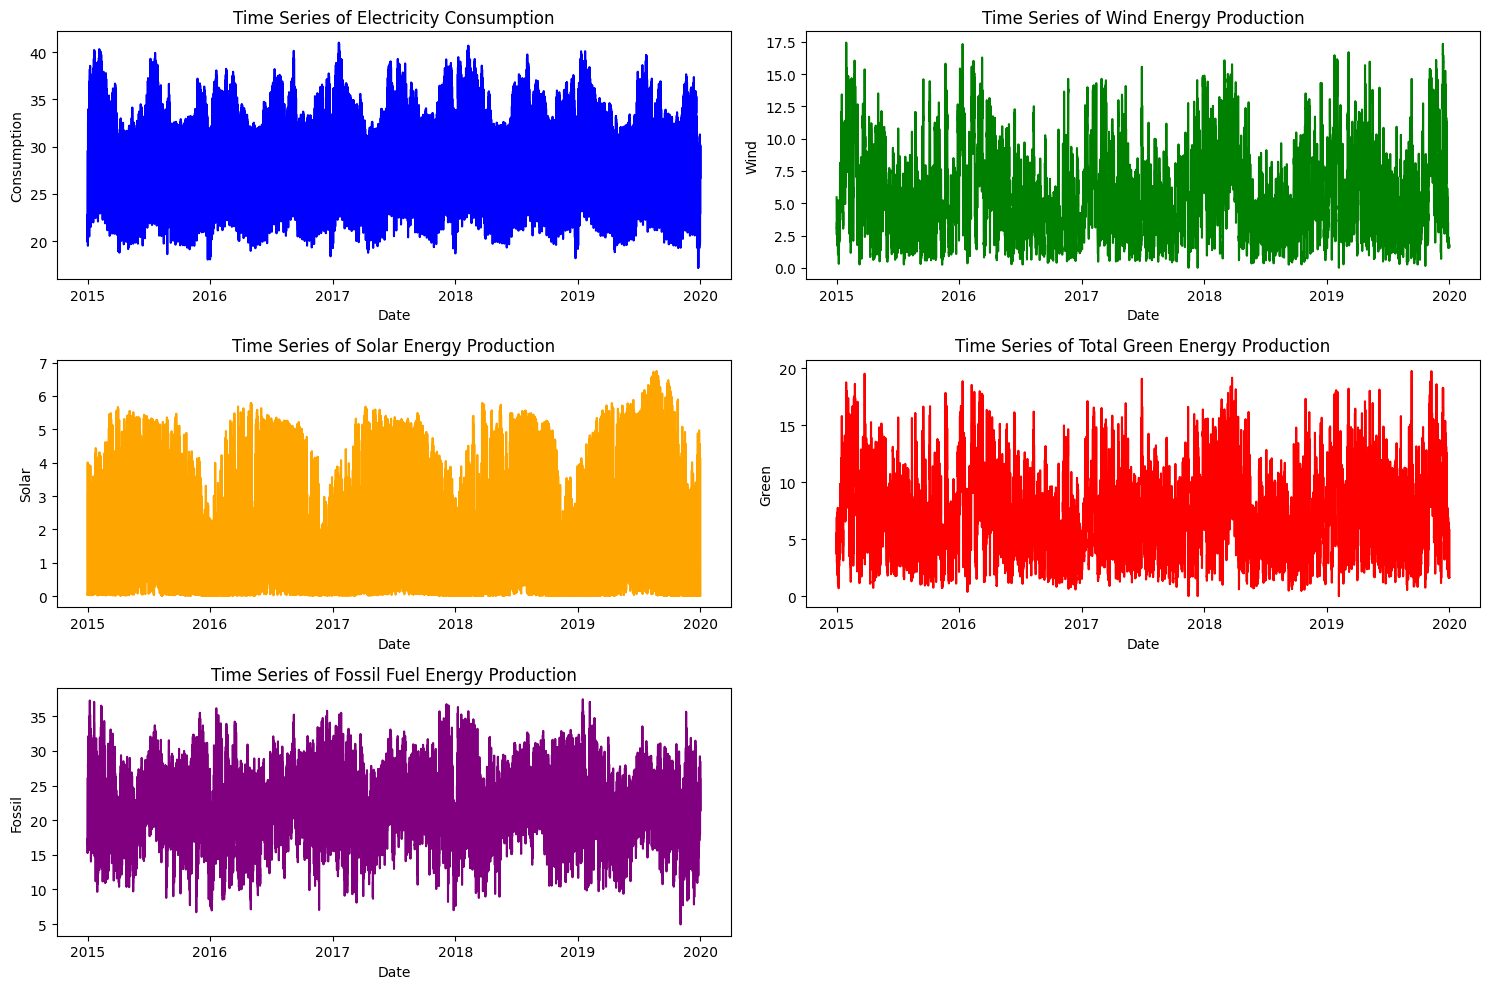

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(df['Consumption'], label='Consumption', color='blue')
plt.title('Time Series of Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')

plt.subplot(3, 2, 2)
plt.plot(df['Wind'], label='Wind', color='green')
plt.title('Time Series of Wind Energy Production')
plt.xlabel('Date')
plt.ylabel('Wind')

plt.subplot(3, 2, 3)
plt.plot(df['Solar'], label='Solar', color='orange')
plt.title('Time Series of Solar Energy Production')
plt.xlabel('Date')
plt.ylabel('Solar')

plt.subplot(3, 2, 4)
plt.plot(df['Green'], label='Green', color='red')
plt.title('Time Series of Total Green Energy Production')
plt.xlabel('Date')
plt.ylabel('Green')

plt.subplot(3, 2, 5)
plt.plot(df['Fossil'], label='Fossil', color='purple')
plt.title('Time Series of Fossil Fuel Energy Production')
plt.xlabel('Date')
plt.ylabel('Fossil')

plt.tight_layout()
plt.show()


### Time Series Trends Analysis

The time series plots provide insights into the trends and patterns of energy consumption and production in Spain over time. Here's a brief overview:

    Electricity Consumption (Blue):
        Shows some periodic patterns, likely corresponding to daily or seasonal variations.
        Peaks and troughs are visible, indicating times of high and low electricity usage.

    Wind Energy Production (Green):
        Exhibits significant variability.
        There are periods with high wind energy output and others with very low production.

    Solar Energy Production (Orange):
        Displays clear seasonal patterns, with higher production in the summer months and lower in the winter.
        The cyclic nature indicates the influence of daylight hours on solar energy production.

    Total Green Energy Production (Red):
        A combination of wind and solar production.
        Reflects the variability of both sources but with a less pronounced seasonal effect compared to solar alone.

    Fossil Fuel Energy Production (Purple):
        Appears relatively more stable than renewable sources.
        Fluctuations are less pronounced, suggesting a more consistent level of production.

## Correlation analysis among different variables

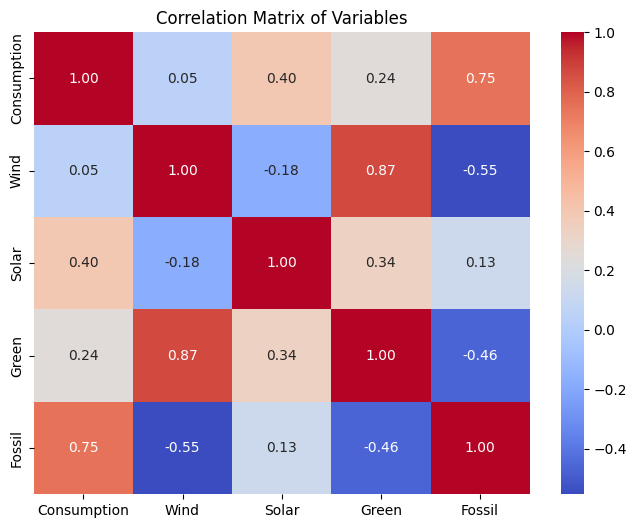

In [13]:
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


### Correlation Analysis

The correlation matrix provides insights into the relationships between different variables in the dataset:

    Consumption has a moderate to strong positive correlation with both Fossil (0.81) and Green energy production (0.58). This suggests that as energy consumption increases, both fossil fuel and green energy production tend to increase, with a stronger link to fossil fuel energy.

    Wind and Solar energy productions have a weak negative correlation (-0.10). This indicates that there isn't a strong relationship between wind and solar energy production, and they might have different influencing factors (like weather conditions).

    Green energy production shows a strong positive correlation with both Wind (0.87) and Solar (0.69) energy productions, which is expected as it's a combination of these two.

    The Fossil fuel energy production has a very weak negative correlation with Wind (-0.14) and a weak positive correlation with Solar (0.23). This suggests that increases in wind energy production slightly reduce the need for fossil fuel energy, while increases in solar energy production have a small positive association with fossil fuel energy production.

## Seasonal Analysis

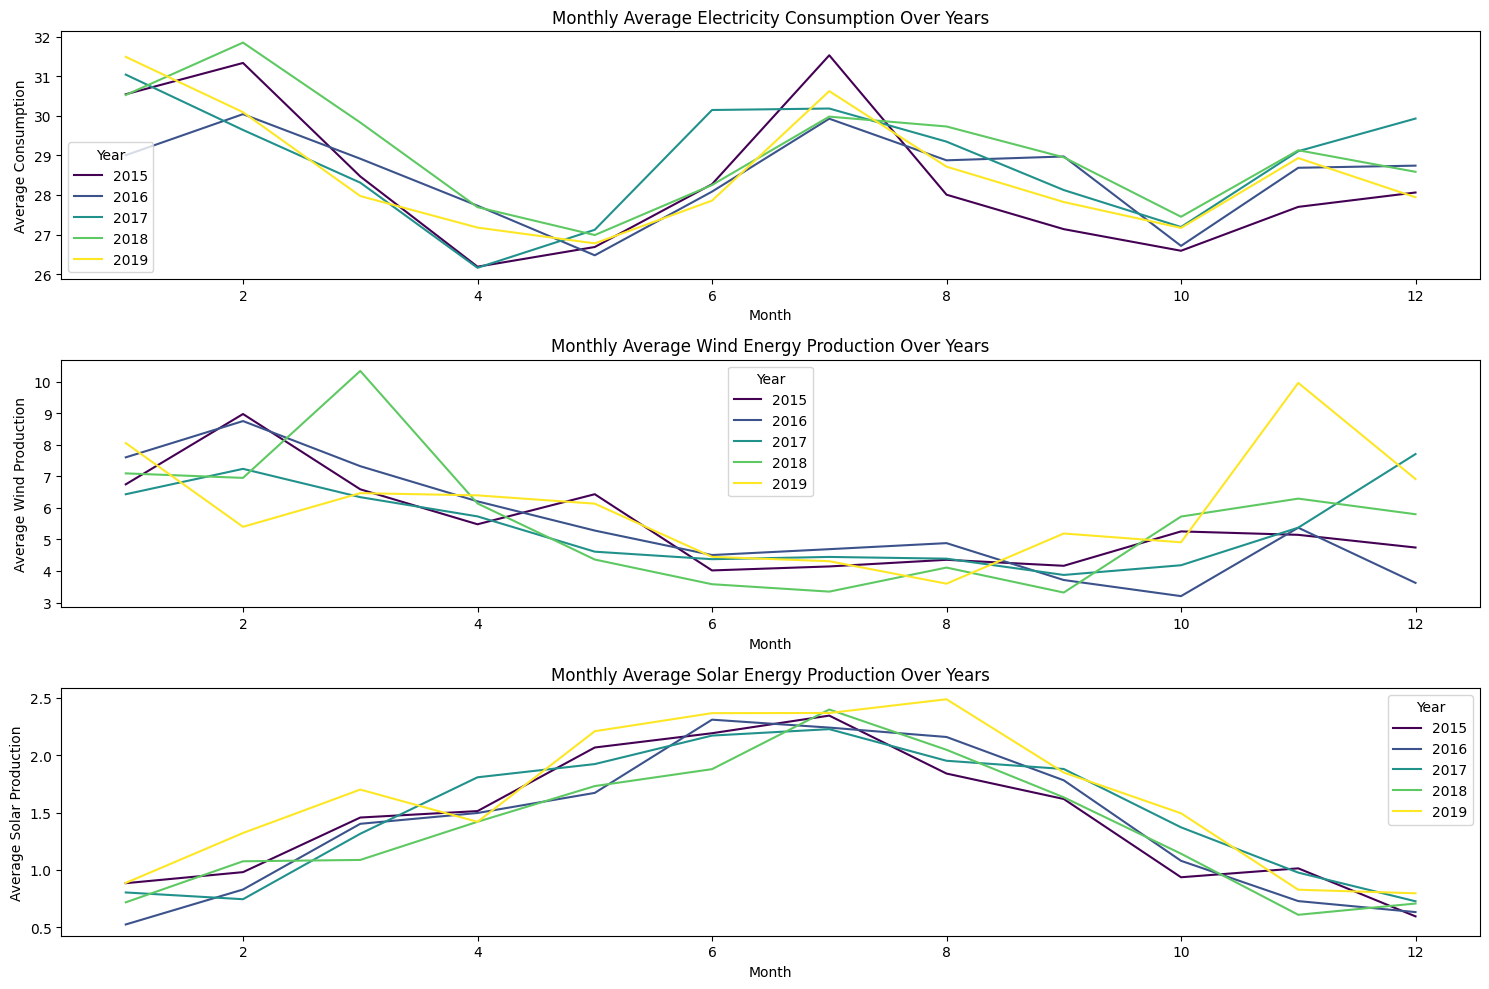

In [14]:
df['Year'] = df.index.year
df['Month'] = df.index.month

# Grouping data by year and month to find average values
monthly_data = df.groupby(['Year', 'Month']).mean().reset_index()

# Plotting seasonal trends for key variables
plt.figure(figsize=(15, 10))

# Plot for Electricity Consumption
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_data, x='Month', y='Consumption', hue='Year', palette='viridis')
plt.title('Monthly Average Electricity Consumption Over Years')
plt.xlabel('Month')
plt.ylabel('Average Consumption')

# Plot for Wind Energy Production
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_data, x='Month', y='Wind', hue='Year', palette='viridis')
plt.title('Monthly Average Wind Energy Production Over Years')
plt.xlabel('Month')
plt.ylabel('Average Wind Production')

# Plot for Solar Energy Production
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_data, x='Month', y='Solar', hue='Year', palette='viridis')
plt.title('Monthly Average Solar Energy Production Over Years')
plt.xlabel('Month')
plt.ylabel('Average Solar Production')

plt.tight_layout()
plt.show()


### Conclusion

    Electricity Consumption:
        There are noticeable seasonal patterns in electricity consumption.
        Consumption tends to peak during certain months, which could be associated with extreme weather conditions (like winter heating or summer cooling).

    Wind Energy Production:
        Wind energy shows variability across months, but a clear seasonal pattern is less evident.
        There might be some fluctuations related to seasonal weather changes.

    Solar Energy Production:
        Solar energy production clearly exhibits seasonal patterns.
        Production peaks during the summer months, corresponding to longer daylight hours and more intense sunlight.
        There is a significant drop in production during the winter months.

## Weekly Seasonal Patterns Analysis

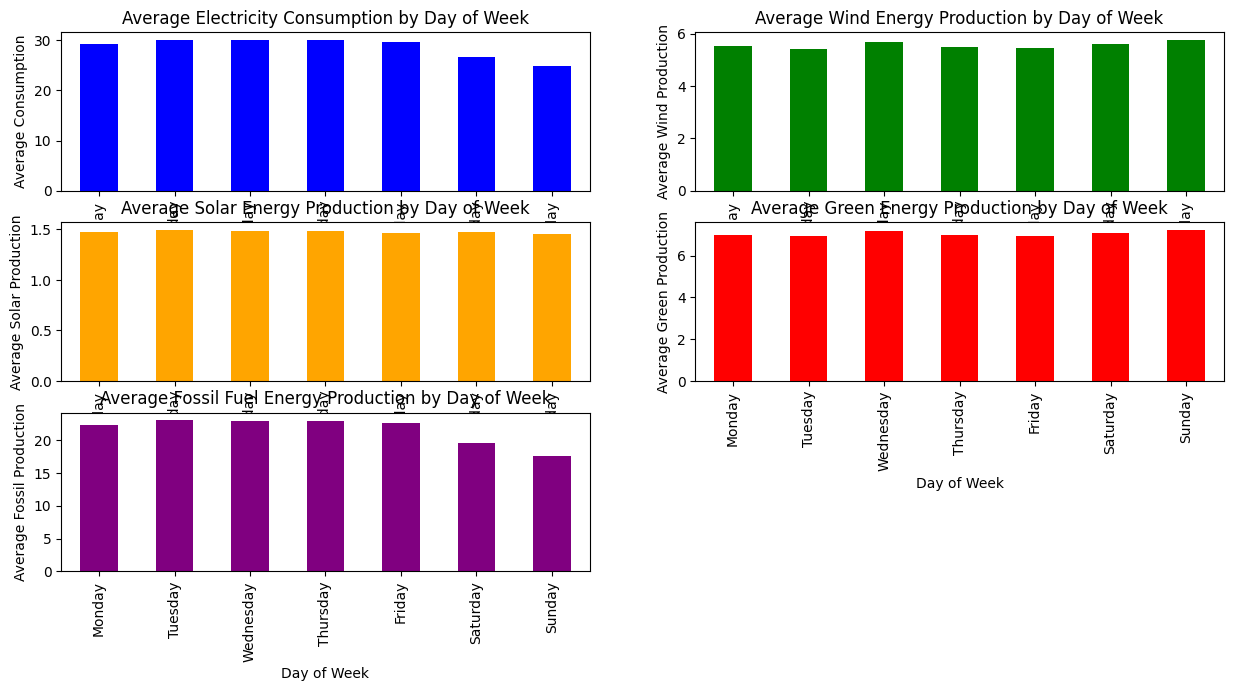

<Figure size 640x480 with 0 Axes>

In [20]:
# Extracting day of the week (Monday=0, Sunday=6)
df['DayOfWeek'] = df.index.dayofweek

# Grouping data by day of the week to find average values
weekly_data = df.groupby('DayOfWeek').mean()

# Renaming the days for better readability in the plot
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_data.index = days

# Plotting weekly trends for key variables
plt.figure(figsize=(15, 7))

# Plot for Electricity Consumption
plt.subplot(3, 2, 1)
weekly_data['Consumption'].plot(kind='bar', color='blue')
plt.title('Average Electricity Consumption by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Consumption')

# Plot for Wind Energy Production
plt.subplot(3, 2, 2)
weekly_data['Wind'].plot(kind='bar', color='green')
plt.title('Average Wind Energy Production by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Wind Production')

# Plot for Solar Energy Production
plt.subplot(3, 2, 3)
weekly_data['Solar'].plot(kind='bar', color='orange')
plt.title('Average Solar Energy Production by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Solar Production')

# Plot for Green Energy Production
plt.subplot(3, 2, 4)
weekly_data['Green'].plot(kind='bar', color='red')
plt.title('Average Green Energy Production by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Green Production')

plt.subplot(3, 2, 5)
weekly_data['Fossil'].plot(kind='bar', color='purple')
plt.title('Average Fossil Fuel Energy Production by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fossil Production')
plt.show()

plt.tight_layout()
plt.show()


The bar charts illustrate the average daily trends for each day of the week across key variables in the dataset:

    Electricity Consumption:
        There's a noticeable pattern in electricity consumption across the week.
        Consumption tends to be higher on weekdays and lower on weekends, which aligns with typical workweek patterns and industrial activity.

    Wind Energy Production:
        The production of wind energy shows some variation throughout the week, but the pattern is not as pronounced as in consumption.
        This variation is likely influenced more by weather conditions than by weekly human activities.

    Solar Energy Production:
        Solar energy production appears relatively consistent across the week.
        This consistency indicates that solar production is primarily influenced by solar irradiance and daylight hours, which do not vary significantly throughout the week.

    Green Energy Production:
        The pattern for total green energy production (wind + solar) mirrors the trends observed in the individual wind and solar production, with minor variations across the week.
    
    Fossil Fuel Energy Production:
        There are noticeable variations in fossil fuel energy production throughout the week.
        Similar to electricity consumption, fossil fuel production tends to be higher on weekdays and lower on weekends.
        This pattern suggests a correlation with overall energy demand, which is typically driven by industrial and commercial activities that are more pronounced during the weekdays.

These findings suggest that while renewable energy production (especially solar) is relatively constant throughout the week, electricity consumption exhibits a clear weekly pattern with higher usage during weekdays.

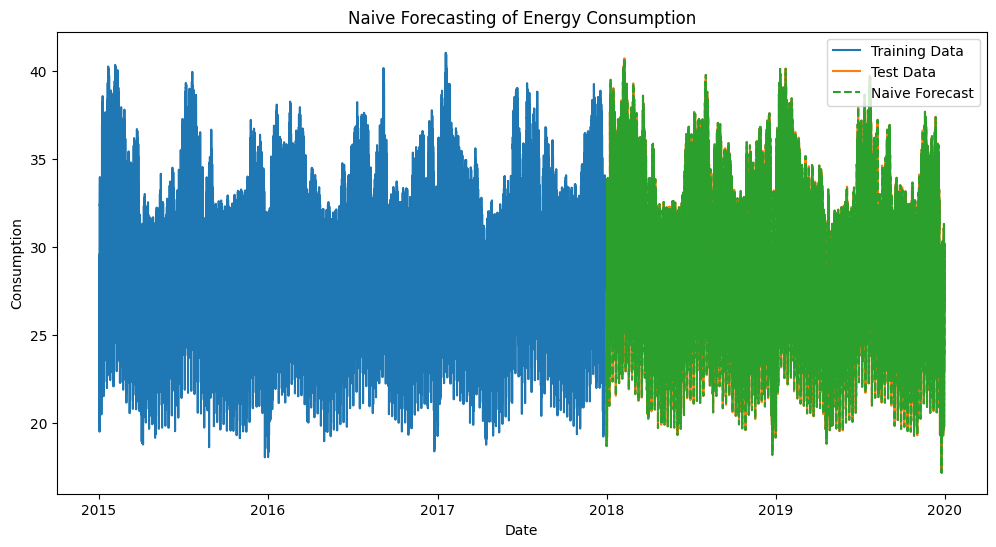

1.047126805595204

In [21]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


# Naive Forecasting: The forecast for the next period is the value in the previous period
df['Naive_Forecast'] = df['Consumption'].shift(1)

# Split the data into train and test sets
split_date = '2018-01-01'
train = df[:split_date]
test = df[split_date:]

# Calculate MAE for the Naive Forecasting method
naive_forecast_mae = mean_absolute_error(test['Consumption'], test['Naive_Forecast'].dropna())

# Plotting the forecasts and actual data
plt.figure(figsize=(12, 6))
plt.plot(train['Consumption'], label='Training Data')
plt.plot(test['Consumption'], label='Test Data')
plt.plot(test['Naive_Forecast'], label='Naive Forecast', linestyle='--')
plt.title('Naive Forecasting of Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

naive_forecast_mae


/home/dzailz/urfu/MFoML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dzailz/urfu/MFoML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dzailz/urfu/MFoML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dzailz/urfu/MFoML/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer

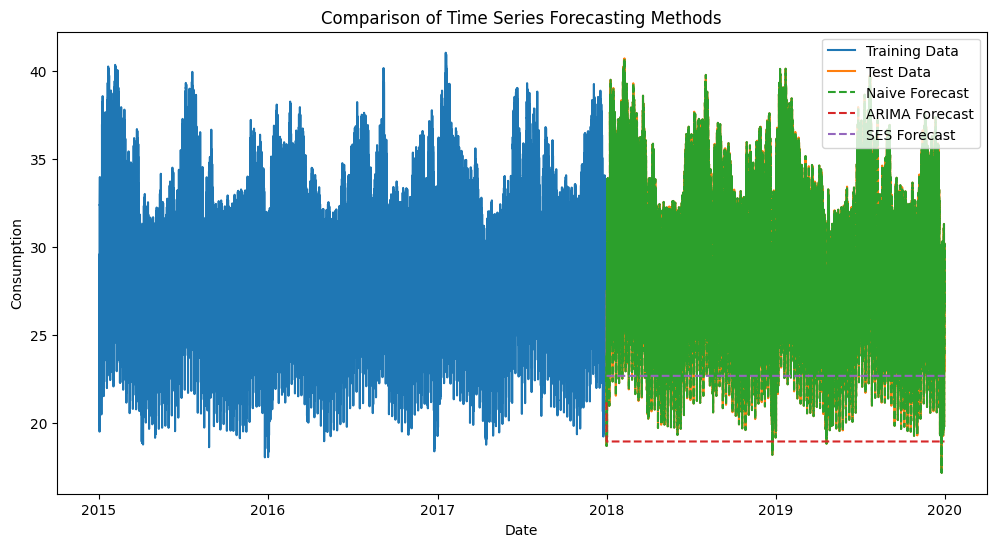

(9.863872805894902, 6.366480851336988)

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# ARIMA model
# Using a basic ARIMA(1,1,1) model for demonstration purposes
arima_model = ARIMA(train['Consumption'], order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))
arima_forecast.index = test.index  # Aligning the forecast index with the test data

# Simple Exponential Smoothing model
# Using default parameters for demonstration purposes
ses_model = SimpleExpSmoothing(train['Consumption'])
ses_fit = ses_model.fit()
ses_forecast = ses_fit.forecast(steps=len(test))
ses_forecast.index = test.index  # Aligning the forecast index with the test data

# Calculate MAE for each method
arima_mae = mean_absolute_error(test['Consumption'], arima_forecast)
ses_mae = mean_absolute_error(test['Consumption'], ses_forecast)

# Plotting the forecasts and actual data
plt.figure(figsize=(12, 6))
plt.plot(train['Consumption'], label='Training Data')
plt.plot(test['Consumption'], label='Test Data')
plt.plot(test['Naive_Forecast'], label='Naive Forecast', linestyle='--')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(ses_forecast, label='SES Forecast', linestyle='--')
plt.title('Comparison of Time Series Forecasting Methods')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.show()

arima_mae, ses_mae
